# **Intro to PyTorch**

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# !pip install mitdeeplearning --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.6/570.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
  

In [ ]:
import mitdeeplearning as mdl


import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 0-D
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")

`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732


In [ ]:
#1-D
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_to_100 = torch.tensor(range(100))

print(f"`fibonacci` is a {fibonacci.ndim}-d Tensor with shape: {fibonacci.shape}")
print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}")

`fibonacci` is a 1-d Tensor with shape: torch.Size([6])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


In [ ]:
matrix = torch.tensor([[1, 2, 3, 4], [1, 6, 9, 7]])

print(matrix.ndim)

2


In [ ]:
assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.ndim == 2

In [ ]:
images = torch.tensor([[1, 2, 3, 4], [1, 6, 9, 7], [1, 6, 9, 7], [1, 6, 9, 7]])

In [ ]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector}")
print(f"`column_vector`: {column_vector}")
print(f"`scalar`: {scalar}")

`row_vector`: tensor([1, 6, 9, 7])
`column_vector`: tensor([2, 6])
`scalar`: 2


In [ ]:
a = torch.tensor(80)
b = torch.tensor(20)

c1 = torch.add(a, b)
c2 = a = b

print(f'c1 = {c1}')
print(f'c2 = {c2}')

c1 = 100
c2 = 20


In [ ]:
# help(torch.nn.Linear)

Help on class Linear in module torch.nn.modules.linear:

class Linear(torch.nn.modules.module.Module)
 |  Linear(in_features: int, out_features: int, bias: bool = True, device=None, dtype=None) -> None
 |  
 |  Applies an affine linear transformation to the incoming data: :math:`y = xA^T + b`.
 |  
 |  This module supports :ref:`TensorFloat32<tf32_on_ampere>`.
 |  
 |  On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.
 |  
 |  Args:
 |      in_features: size of each input sample
 |      out_features: size of each output sample
 |      bias: If set to ``False``, the layer will not learn an additive bias.
 |          Default: ``True``
 |  
 |  Shape:
 |      - Input: :math:`(*, H_{in})` where :math:`*` means any number of
 |        dimensions including none and :math:`H_{in} = \text{in\_features}`.
 |      - Output: :math:`(*, H_{out})` where all but the last dimension
 |        are the same shape as the input 

In [ ]:
def func(a, b):

  c = torch.add(a, b)
  d = torch.subtract(b, 1)

  e = torch.multiply(c, d)

  return e

func(5, 6)

tensor(55)

# NN in PyTorch

In [ ]:
class OurDenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(OurDenseLayer, self).__init__()
        # Define and initialize parameters: a weight matrix W and bias b
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))

    def forward(self, x):
        '''TODO: define the operation for z (hint: use torch.matmul).'''
        z = torch.matmul(x, self.W) + self.bias

        '''TODO: define the operation for out (hint: use torch.sigmoid).'''
        y = torch.sigmoid(z)
        return y

In [ ]:
# Define a layer and test the output!
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.4358, 0.7388, 0.0222]], grad_fn=<SigmoidBackward0>)


In [ ]:
# Define NN with PyTorch Sequential API

# n of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# Define the model
'''TODO: Use the Sequential API to define a neural network with a
    single linear (dense!) layer, followed by non-linearity to compute z'''
model = nn.Sequential(
    nn.Linear(n_input_nodes, n_output_nodes), #Linear Layer
    nn.Sigmoid() #Non-linear activation function
)

In [ ]:
# Test the model with example input
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.4358, 0.7388, 0.0222]], grad_fn=<SigmoidBackward0>)


In [ ]:
# Define a model using subclassing

class LinearWithSigmoidActivation(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super(LinearWithSigmoidActivation, self).__init__()
    self.linear = nn.Linear(num_inputs, num_outputs)
    self.activation = nn.Sigmoid()

  def forward(self, inputs):
    linear = self.linear(inputs)
    output = self.activation(inputs)
    return output

In [ ]:
n_input_nodes = 2
n_output_nodes = 3
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([[1, 2.]])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 2])
output result: tensor([[0.7311, 0.8808]])


In [ ]:
# Custom behavior with subclassing nn.Module

class LinearButSometimesIdentity(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super(LinearButSometimesIdentity, self).__init__() #ensures that the parent class's initialization
                                            # logic is executed before the subclass's own initialization.
    self.linear = nn.Linear(num_inputs, num_outputs)

  def forward(self, inputs, isidentity=False):

    if isidentity:
      # If True, return the input tensor unchanged.
      return inputs

    else:
      # If False, apply the standard linear transformation.
      return self.linear(inputs)


In [ ]:
# --- Example Usage ---

# 1. Setup the layer and some input data
layer = LinearButSometimesIdentity(num_inputs=10, num_outputs=5)
input_tensor = torch.randn(1, 10) # A single sample with 10 features

# 2. Test the "Linear Mode" (isidentity is False by default)
output_linear = layer(input_tensor)
print("--- Linear Mode ---")
print(f"Input shape:  {input_tensor.shape}")
print(f"Output shape: {output_linear.shape}")
print("Output is a new, transformed tensor.\n")


# 3. Test the "Identity Mode"
output_identity = layer(input_tensor, isidentity=True)
print("--- Identity Mode ---")
print(f"Input shape:  {input_tensor.shape}")
print(f"Output shape: {output_identity.shape}")

# Verify that the output is identical to the input
print(f"Are input and output identical? {torch.equal(input_tensor, output_identity)}")

--- Linear Mode ---
Input shape:  torch.Size([1, 10])
Output shape: torch.Size([1, 5])
Output is a new, transformed tensor.

--- Identity Mode ---
Input shape:  torch.Size([1, 10])
Output shape: torch.Size([1, 10])
Are input and output identical? True


**Automatic Differentiation in PyTorch**

In [ ]:
#Gradient computation

# y = x^2
# Ex: x = 3.0

x = torch.tensor(3.0, requires_grad=True) #requires_grad=True on a tensor tells PyTorch
   # to track all operations performed on that tensor, allowing for automatic
   # differentiation (calculating gradients) during the training process

y = x ** 2
y.backward() #computing the gradient

dy_dx = x.grad
print(f"dy_dx of y = x^2 at x = 3.0 is: {dy_dx}")
assert dy_dx == 6.0

dy_dx of y = x^2 at x = 3.0 is: 6.0


Initial value of x: -0.15535707771778107


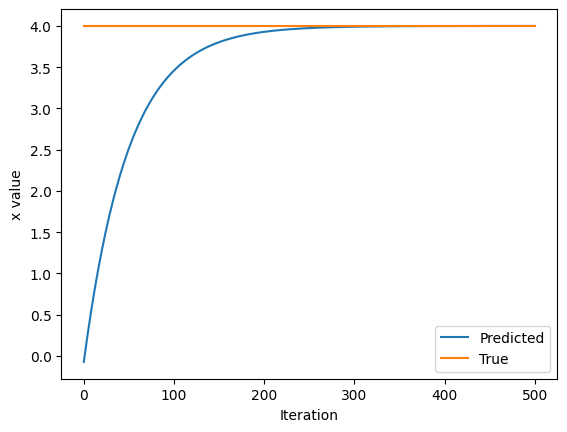

In [ ]:
# Function minimization with autograd and gradient descent

#random value for the initial x
x = torch.randn(1)
print(f"Initial value of x: {x.item()}")

learning_rate = 1e-2
history = []
x_f = 4 #Target Value

# We will run gradient descent for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the update.

for i in range(500):
  x = torch.tensor([x], requires_grad=True)

  #Compute the loss as the square of the difference between x and x_f
  loss = torch.square(x - x_f)

  #Backpropagate through the loss to compute the gradient of the loss with respect to x
  loss.backward()

  #update x with gradient descent
  x = x.item() - learning_rate * x.grad

  history.append(x.item())

# Plot the evolution of x as we optimize toward x_f!
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

# Understanding Your Optimization Graph and Code

Let's break down exactly what's happening in your example.

## 1. What Happened in the Graph?

The graph visually represents a process of **optimization** over 500 steps (iterations).

* **The "True" Line (Orange):**
    * This is a flat line at a value of `4.0`.
    * It represents your constant, unchanging **target value** ($x_f$). This is the goal you want your variable to reach.

* **The "Predicted" Line (Blue):**
    * This line shows the value of your variable `x` at each iteration.
    * It starts at a random value near zero.
    * In the beginning, it rises very quickly, making large progress toward the target.
    * As it gets closer to `4.0`, the line gets flatter, and the progress slows down, indicating finer adjustments.
    * By the end of the 500 iterations, the "Predicted" value is extremely close to the "True" value of `4.0`.

In short, the graph shows a variable `x` starting at a random point and intelligently "learning" to become `4.0` over time.

## 2. What Did The Code Do? (Step-by-Step)

Your code tells the computer to find the value of `x` that minimizes the distance to a target `x_f`. It does this without being explicitly told "the answer is 4," but by "feeling" its way toward the answer.

Here is the breakdown of the process, which is called **Gradient Descent**:

* **The Goal:** Make the `loss` as small as possible. The `loss` is defined as $(x - x_f)^2$. The only way to make this loss zero is for `x` to be equal to `x_f`.

* **The Analogy:** Imagine you are on a mountain in a thick fog, and you want to get to the lowest point in the valley. You can't see the valley, but you can feel the slope of the ground right under your feet.
    * `x` is your current position on the mountainside.
    * `loss` is your current altitude. A high loss means you're high up the mountain.
    * The `gradient` (`x.grad`) is the direction of the steepest uphill slope from where you are standing.
    * To get to the valley (lowest loss), you must take a small step in the exact opposite direction of the gradient (i.e., you take a step downhill).

This is what the loop does 500 times:

1.  `x = torch.tensor([x], requires_grad=True)`:
    * Prepares your variable `x` for the calculation.
    * Crucially, `requires_grad=True` tells PyTorch: "Keep track of all operations involving `x`, because I will need to know how `x` affects the final result (the loss)."

2.  `loss = torch.square(x - x_f)`:
    * Calculates your "altitude" (the error).
    * If your current `x` is 1 and the target `x_f` is 4, the loss is $(1-4)^2 = 9$.
    * If `x` is 3.9, the loss is $(3.9-4)^2 = 0.01$.
    * The further you are from the target, the larger the loss.

3.  `loss.backward()`:
    * This is the magic of PyTorch (and automatic differentiation). It automatically calculates the derivative (the **gradient**) of the `loss` with respect to `x`. This tells you the direction of steepest ascent (uphill).
    * For the loss function $(x-4)^2$, the derivative is $2(x-4)$. This gradient value is stored in `x.grad`.
    * **Why this matters:**
        * If `x` is 1, the gradient is $2(1-4) = -6$. The negative sign tells you that increasing `x` will *decrease* the loss.
        * If `x` is 5, the gradient is $2(5-4) = 2$. The positive sign tells you that *decreasing* `x` will decrease the loss.
        * The gradient always points you in the right direction!

4.  `x = x.item() - learning_rate * x.grad`:
    * This is the **update step** where you take a step downhill.
    * You take your current position (`x.item()`).
    * You move in the **opposite direction** of the gradient (`- x.grad`).
    * `learning_rate` (`0.01` in your code) is your **step size**. It controls how big of a step you take. This is important: too big a step and you might overshoot the valley; too small and it will take too long to get there.

5.  `history.append(x.item())`:
    * You record your new position after taking the step. This list is then used to plot the blue line.

## 3. What Is It Used For?

This simple example demonstrates the fundamental engine that powers nearly all of modern AI and deep learning.

While finding the value 4 is trivial for a human, this exact same process is used to train massive, complex neural networks like ChatGPT, Midjourney, or the models in your phone's camera.

* Instead of one parameter `x`, a neural network has millions or billions of parameters (often called **weights and biases**).
* Instead of a simple loss function $(x-4)^2$, the loss function measures how "wrong" the network's predictions are compared to real-world data (e.g., how badly it misclassifies an image of a cat or how inaccurate its translation of a sentence is).

The process is identical: The model makes a prediction, the loss (error) is calculated, `loss.backward()` computes the gradient for all million parameters simultaneously, and then every single parameter is updated slightly using the gradient descent rule.

This is repeated millions of times with vast amounts of data, and with each tiny step, the network gets progressively less "wrong" and more accurate. Your code is the "Hello, World!" of how machines learn from error.

# **Intro to TensorFlow**

In [3]:
import tensorflow as tf

# !pip install mitdeeplearning --quiet
# import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 0-D
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


In [ ]:
# 1-D
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [ ]:
# high-order Tensors (matrix)

# 2-D
matrix = tf.constant([[1, 2, 3], [4, 5, 6]])

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [ ]:
# 4-D
images = tf.zeros([10, 256, 256, 3])  # shape = (10, 256, 256, 3)

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

In [ ]:
row_vector = matrix[1]
column_vector = matrix[:,1]
scalar = matrix[0, 1]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [4 5 6]
`column_vector`: [2 5]
`scalar`: 2


In [ ]:
a = tf.constant(15)
b = tf.constant(20)

c = tf.add(a, b)
c2 = a + b

print(c.numpy())
print(c2.numpy())


d = tf.subtract(b, 5)
e = tf.multiply(c, d)

print("d:", d.numpy())
print("e:", e.numpy())

35
35
d: 15
e: 525


In [ ]:
def func(a, b):

  c = tf.add(a, b)
  d = tf.subtract(b, 1)
  e = tf.multiply(c, d)

  return e


a = tf.constant(2)
b = tf.constant(3)

e = func(a, b)
print(e.numpy())

10


In [ ]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


# NN in TensorFlow

TensorFlow uses a high-level API called Keras that provides a powerful, intuitive framework for building and training deep learning models.

In [6]:
# Defining a network layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight(
        name="W",                                 # give it a clear name
        shape=(d, self.n_output_nodes),           # rows = input dim, cols = output dim
        initializer="glorot_uniform",             # or any initializer you like
        trainable=True
    )

    self.b = self.add_weight(
        name="b",
        shape=(self.n_output_nodes,),             # 1‑D bias, one per output node
        initializer="zeros",
        trainable=True
    )

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.matmul(x, self.W) + self.b

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y

In [8]:
tf.keras.utils.set_random_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())

[[0.22883518 0.22115576 0.32149363]]


In [9]:
# Defining a neural network using the Sequential API
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3

# First define the model
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
dense_layer = Dense(n_output_nodes, activation="sigmoid")

# Add the dense layer to the model
model.add(dense_layer)

In [13]:
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''
model_output = dense_layer(x_input)
print(model_output)

tf.Tensor([[0.6172473 0.2669089 0.675712 ]], shape=(1, 3), dtype=float32)


In [15]:
# Defining a model using subclassing

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    '''TODO: Our model consists of a single Dense layer. Define this layer.'''
    self.dense_layer = Dense(n_output_nodes, activation="sigmoid")

  # In the call function, we define the Model's forward pass.
  def call(self, inputs):
    return self.dense_layer(inputs)

In [16]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.18752207 0.23909676 0.3213029 ]], shape=(1, 3), dtype=float32)


In [17]:
# Defining a model using subclassing and specifying custom behavior

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  # As before, in __init__ we define the Model's layers
  # Since our desired behavior involves the forward pass, this part is unchanged
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

  '''TODO: Implement the behavior where the network outputs the input, unchanged, under control of the isidentity argument.'''
  def call(self, inputs, isidentity=False):
      if isidentity:
      # If True, return the input tensor unchanged.
        return inputs

      else:
      # If False, apply the standard linear transformation.
        return self.dense_layer(inputs)

In [19]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.82794297 0.155684   0.567044  ]]; network identity output: [[1. 2.]]


In [20]:
# Gradient computation with GradientTape

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

Initializing x=[[0.40308788]]


Text(0, 0.5, 'x value')

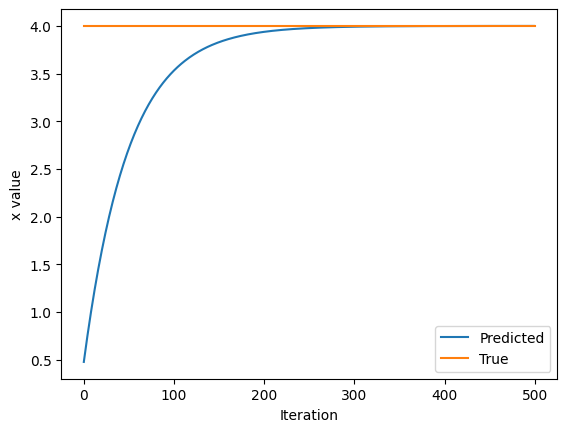

In [22]:
# Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = tf.square(x - x_f)

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')